# Word2Vec 직접 구현

In [ ]:
doc = 'you will never know until you try'

In [ ]:
# 1. 입력 문장 토큰화

tokens = doc.split()
tokens

['you', 'will', 'never', 'know', 'until', 'you', 'try']

In [ ]:
# 가중치 행렬 초기화
V = len(set(tokens)) # 유니크한 단어 수
N = 4 # 임베딩 차원 수

import numpy as np

W1 = np.random.rand(V, N)
W2 = np.random.rand(N, V)

In [ ]:
W1

array([[0.16706635, 0.50201166, 0.26023192, 0.0909682 ],
       [0.80627133, 0.46452407, 0.02396506, 0.89092634],
       [0.43522734, 0.83778993, 0.43958554, 0.61408447],
       [0.74132226, 0.83938373, 0.82681653, 0.70989679],
       [0.32434718, 0.88594071, 0.26621789, 0.1628421 ],
       [0.3454707 , 0.56313297, 0.57234765, 0.56572554]])

In [ ]:
print(W2)

[[0.8258209  0.72145237 0.69240276 0.10646522 0.31520983 0.37404955]
 [0.67202008 0.39856966 0.28578391 0.11975541 0.66936122 0.62968863]
 [0.34658711 0.45770879 0.83354775 0.99485189 0.6242996  0.78705514]
 [0.31887058 0.26235249 0.5547687  0.49502284 0.53884625 0.33314883]]


In [ ]:
one_hot_vector = np.eye(V)
word2idx = {v: i for i, v in enumerate(set(tokens))}

In [ ]:
word2idx

{'until': 0, 'will': 1, 'never': 2, 'you': 3, 'know': 4, 'try': 5}

In [ ]:
# 학습을 위한 데이터 구축
training_data = [
    # [target_word, (context_words)]
]

window_size = 1
for i, token in enumerate(tokens):
    target_word = token
    context_words = []
    if i-1 >= 0:
        context_words.append(tokens[i-1])
    if i+1 < len(tokens):
        context_words.append(tokens[i+1])
    training_data.append([target_word, context_words])
training_data

[['you', ['will']],
 ['will', ['you', 'never']],
 ['never', ['will', 'know']],
 ['know', ['never', 'until']],
 ['until', ['know', 'you']],
 ['you', ['until', 'try']],
 ['try', ['you']]]

In [ ]:
W1

array([[0.16706635, 0.50201166, 0.26023192, 0.0909682 ],
       [0.80627133, 0.46452407, 0.02396506, 0.89092634],
       [0.43522734, 0.83778993, 0.43958554, 0.61408447],
       [0.74132226, 0.83938373, 0.82681653, 0.70989679],
       [0.32434718, 0.88594071, 0.26621789, 0.1628421 ],
       [0.3454707 , 0.56313297, 0.57234765, 0.56572554]])

In [ ]:
# 학습

learning_rate = 0.01

loss_list = []
for epoch in range(100):
    loss_total = 0.0
    for target_word, context_words in training_data:
        # Feed Forward
        # 1. Input - Hidden
        for word in context_words:
            hidden_vector = one_hot_vector[word2idx[word], :].reshape(1, V).dot(W1) # 1x4 행렬
            # print(hidden_vector)

            # 2. Hidden - Output
            output_vector = hidden_vector.dot(W2) # 1x6 행렬

            # Activation Function (Softmax)
            def softmax(x):
                return np.exp(x) / np.sum(np.exp(x))

            y_hat = softmax(output_vector)
            y_real = one_hot_vector[word2idx[target_word], :] # (6, )

            # 3. Loss 계산 cross entropy loss
            loss = -np.sum(y_real * np.log(y_hat))

            loss_total += loss

            # 4. Backpropagation
            gradient_w2 = hidden_vector.T.dot(y_hat - y_real) # 1x4 * 1x6 -> 4x6
            # print(gradient_w2)
            # one hot vector = 1x6
            # w2 4x6
            # y_hat - y_real # 1x6
            # 4x1.T => 1x4

            # w1 해당 단어 가중치만 업데이트 (1x4)
            gradient_w1 = (y_hat-y_real).dot(W2.T)
            # print(gradient_w1)

            W1[word2idx[word], :] -= learning_rate * gradient_w1.ravel()
            W2 -= learning_rate * gradient_w2
    loss_list.append(loss_total)


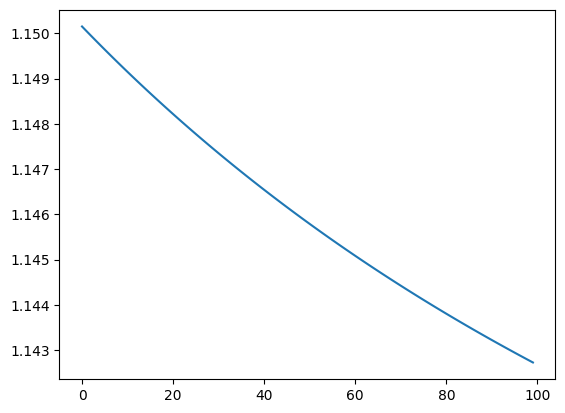

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_list)

In [ ]:
W1, W2

(array([[-1.58785003,  0.33759909,  0.81013329,  1.04521738],
        [ 0.91077929, -0.69445197,  0.31259805,  1.9834525 ],
        [-0.5871099 ,  2.32109736,  0.16554707,  0.44610842],
        [ 1.40380457,  1.38714984,  0.78756752, -1.03399417],
        [ 1.97648957,  0.08650235, -0.99526432,  0.46962205],
        [-0.21767181, -0.27105325,  1.59971781,  1.49744065]]),
 array([[ 2.03984375,  0.31606263,  1.65374134, -0.42054359, -1.47105537,
          0.91735187],
        [ 0.53919661,  1.90645118, -0.67599298, -0.76311601,  1.3041703 ,
          0.46446982],
        [-0.29093294,  0.69772269, -0.2230439 ,  2.05723509,  0.66664211,
          1.13642724],
        [-0.47977071, -0.20956421,  1.45908379,  2.00294473,  0.75456805,
         -1.02425197]]))

## Word2Vec 대용량 데이터 처리

In [ ]:
import zipfile

In [ ]:
zf = zipfile.ZipFile('./simpsons_dataset.csv.zip')

In [ ]:
zf.extractall('./')

In [ ]:
import pandas as pd

simpson_df = pd.read_csv('./simpsons_dataset.csv')

In [ ]:
simpson_df.head(2).T

,0,1
raw_character_text,Miss Hoover,Lisa Simpson
spoken_words,"No, actually, it was a little of both. Sometim...",Where's Mr. Bergstrom?


In [ ]:
# EDA
print(len(simpson_df))
simpson_df.isna().sum()

158314


raw_character_text    17814
spoken_words          26459
dtype: int64

In [ ]:
sents = simpson_df['spoken_words'].dropna()

In [ ]:
len(sents) #.tolist()

131855

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

sw = stopwords.words()
wnl = WordNetLemmatizer()
ps = PorterStemmer()

def preprocess(sent:str) -> list[str]:
    # 문장부호 제거
    sent = re.sub('[^\w \']+', '', sent)

    # lower()
    sent = sent.lower()

    # 토크나이즈, 불용어 처리, 원형 복원
    tokens = [wnl.lemmatize(token)
            for token in word_tokenize(sent) if token not in sw]

    return tokens # list

In [ ]:
# 멀티프로세싱 사용해볼만한 지점
# 각각의 문장에 독립적으로 함수를 적용하고 그 결과를 합치면 되기 때문
tokens = sents.apply(preprocess)

In [ ]:
total_tokens = []

[total_tokens.extend(sent_token) for sent_token in tokens]

print()

In [ ]:
39000

# 1차원
단어1 = (0.456, 0.245, 0.668)
단어2 = (0.1234)

단어39496 = (0.25432)

# 차원 수 정하는건 memory(하드웨어)와 데이터 수(토큰 수) 종합적으로 고려
# 10
# 256 -> 차원의 저주
# 2 # 적절한 크기

# 딥러닝 단어 임베딩 사이즈 (128, 256), 512

In [ ]:
V = len(set(total_tokens))
N = 64

In [ ]:
# 단어 분포, 단어 to index 딕셔너리 생성

# 단어 분포
# 단어: 빈도, 비율
from collections import Counter
counter = Counter(total_tokens)

# 단어 인덱스
# 단어: 인덱스
word2idx = {k: i for i, k in enumerate(set(total_tokens))}


In [ ]:
len(word2idx)

39496

In [ ]:
len_tokens = len(total_tokens)

In [ ]:
counter_prob = {k: (v/len_tokens)**0.75 for k, v in counter.items()}

In [ ]:
tp = sum(counter_prob.values())
counter_prob = {k: v/tp for k, v in counter_prob.items()}

In [ ]:
import numpy as np
# negative sampling
# target_word랑 같은건 제외
np.random.choice(np.array([word2idx[k] for k in counter_prob]), 3, p=list(counter_prob.values()))

array([ 5218,  3165, 12508])

In [ ]:
np.array(counter_prob.values()).shape

()

In [ ]:
# 가중치 랜덤 초기화

W1 = np.random.rand(V, N)
W2 = np.random.rand(N, V)

W1.shape, W2.shape

((39496, 64), (64, 39496))

In [ ]:
# 학습 데이터셋 구축
training_data = [
    # [target_word, (context_words)]
]

window_size = 1
for sent_token in tokens: # 토큰화된 문장 들 [[문장 1 토큰들], [문장 2 토큰들], ...]
    for i, token in enumerate(sent_token): # [토큰1, 토큰2, 토큰3, ...]
        if len(sent_token) > 1: # 토큰이 하나만 있는 경우 제외
            target_word = token
            # context_words = []
            if i-1 >= 0:
                # context_words.append(sent_token[i-1])
                training_data.append((word2idx[target_word], word2idx[sent_token[i-1]]))
            if i+1 < len(sent_token):
                # context_words.append(sent_token[i+1])
                training_data.append((word2idx[target_word], word2idx[sent_token[i+1]]))
            # training_data.append([target_word, context_words])
# 타겟 단어, [문맥 단어들]
# 위의 데이터 구조에서
# 타겟 단어, 문맥 단어 1
# 타겟 단어, 문맥 단어 2
# 이런 데이터 구조로 바꾼 이유?
# 배치 학습때문
training_data

# 타겟단어, 문맥 단어 # 1개 로우
# 64 개 뽑으면 타겟단어x64 문맥단어x64

In [54]:
# shuffle

batch_size = 64
# [index 들 * 64]

batch_dataset = [
    # [(target, context), (target2, context2)], # batch (batch_size)
    # [(target, context), (target2, context2)], # batch (batch_size)
    # [(target, context), (target2, context2)], # batch (batch_size)
    training_data[i: i + batch_size]
    for i in range(0, len(training_data), batch_size)
]

# 0 * 64 : 1 * 64
# 0 : 64
# 1 * 64 : 2 * 64
# 64: 128


In [57]:
len(training_data) // 64 + 1

13701

In [56]:
len(batch_dataset) # ??

13701

In [ ]:
batch_dataset[0]

In [68]:
# 학습 (배치 적용)

learning_rate = 0.01

loss_list = []
for epoch in range(100):
    loss_total = 0.0

    for batch in batch_dataset:
        # 학습
        for target_word, context_word in batch: # 64개씩
            # Feed Forward
            # 1. Input - Hidden (뽑아서 쓰는걸로 개선)
            hidden_vector = W1[context_word, :] # (64, )

            # Negative Sampling 추가

            # 2. Hidden - Output
            target_vector = hidden_vector.dot(W2[:, target_word]) # (1, 64) * (64, 1) => (1, 1)
            # print(target_vector)

            # Activation Function (Sigmoid)
            def sigmoid(x):
                return 1 / (1+np.exp(-x))

            y_hat = sigmoid(target_vector)
            y_real = 1

            # 3. Loss 계산 binary cross entropy loss
            loss = -y_real * np.log(y_hat) + (1-y_real)*np.log(1-y_hat)
            loss_total += loss

            # 4. Backpropagation
            gradient_w2 = hidden_vector.T.dot(y_hat - y_real) # 64x1 * 1x1 -> 64x1 -> w2[:, target_word]

            # w1 해당 단어 가중치만 업데이트 (1x64)
            gradient_w1 = (y_hat-y_real) * W2.T[target_word, :] # 1x 1 1x 64 -> 1x64
            # print(gradient_w1.shape)

            W1[context_word, :] -= learning_rate * gradient_w1
            W2[:, target_word] -= learning_rate * gradient_w2

    loss_list.append(loss_total)


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

# 1 Word2Vec

In [71]:
# 필요한 데이터를 불러와 it_df와 culture_df에 저장한다
import pandas as pd
it_df = pd.read_csv('./Word Representation_it.csv').dropna()
culture_df = pd.read_csv('./Word Representation_culture.csv').dropna()

In [72]:
# word2vec을 하기 위한 전처리
# it_df와 culture_df의 컬럼 '1'의 토큰을 리스트 형태로 변경
it_token_ls = list(it_df.loc[:,'1'])
culture_token_ls = list(culture_df.loc[:,'1'])

total_token_ls = it_token_ls + culture_token_ls  # it_df의 리스트와 culture_df의 리스트를 한개로 합침

# 리스트의 값을 ','로 분리
total_token_ls = [tokens.split(',') for tokens in total_token_ls]
print(total_token_ls[0][:10])

['배', '정회', '신임', '과학기술', '일자리', '진흥', '원장', '아시아', '경제', '이민']


In [ ]:
total_token_ls[0]

In [74]:
# gensim이라는 패키지에 word2Vec 클래스 사용
from gensim.models import Word2Vec
word2vec = Word2Vec( sentences = total_token_ls,      # 학습시킬 문장 ([[토큰들] 문장들])
                     vector_size = 10,         # 임베딩된 단어 벡터의 차원 크기 n_dim
                     alpha = 0.025,     # 학습률(Learning rate)
                     min_count=2,       # 2번 미만 등장한 단어는 제외
                     window = 4,        # 문맥의 크기 (window_size)
                     sample = 0.001,    # sub-sampling
                     sg = 1,            # 0: CBOW, 1: Skip-gram
                     epochs = 10)         # 전체 문장 반복학습 횟수(epoch)


In [75]:
# '인공'의 단어 임베딩
word_embedding = word2vec.wv.__getitem__('인공')
print(word_embedding)

[ 1.0105355  -0.52829117 -0.18008213  0.16697505  1.0054952  -0.83417076
  1.3217595  -0.09938464 -0.6107242  -0.28369704]


In [76]:
# '데이터'의 단어 임베딩
word_embedding = word2vec.wv.__getitem__('데이터')
print(word_embedding)

[-0.7001429   0.13424662  0.01299188 -0.09878565  1.3942353  -1.3213834
  1.272475    0.691245   -0.82266414 -0.08505181]


In [77]:
# '인공'과 유사도가 높은 단어
word_similar_1 = word2vec.wv.most_similar('인공')
print(word_similar_1)

#'데이터'와 유사도가 높은 단어
word_similar_2 = word2vec.wv.most_similar('데이터')
print(word_similar_2)


[('지능', 0.9744399785995483), ('기기', 0.9626783132553101), ('형', 0.937897801399231), ('기능', 0.9196540117263794), ('이용', 0.910707414150238), ('블록', 0.9054185152053833), ('개발', 0.9017859697341919), ('커뮤니티', 0.9002499580383301), ('적용', 0.8971827030181885), ('프로젝트', 0.892350971698761)]
[('빅', 0.9061788320541382), ('도심', 0.8727111220359802), ('센터', 0.8366978764533997), ('제공', 0.8364999890327454), ('웨이', 0.8347126841545105), ('환경', 0.8290132880210876), ('화', 0.816045880317688), ('앤', 0.8119009137153625), ('투명', 0.8060135245323181), ('엔터테인먼트', 0.8036418557167053)]


In [81]:
word2vec.wv['너지']

KeyError: ignored

# 2 GloVe

- 더이상 지원하지 않음

In [ ]:
# !pip install glove_python_binary

# from glove import Corpus, Glove

# corpus = Corpus()
# corpus.fit(total_token_ls, window=5)
# # 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

# glove = Glove(no_components=100, learning_rate=0.05)
# glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
# glove.add_dictionary(corpus.dictionary)
# # 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

# glove.most_similar("인공")
# glove.most_similar("지능")

# 3 FastText

In [78]:
from gensim.models.word2vec import Text8Corpus
from gensim.models import FastText

# FastText 모델생성
ft_model = FastText(total_token_ls,
                      vector_size=10,                 # 임베딩된 단어 벡터의 차원 크기
                      window=8,                 # 문맥의 크기(window_size)
                      min_count=2,            # 2번 미만 등장한 단어는 제외
                      alpha = 0.025,                    # 학습률(Learning rate)
                      sg = 1,                             # 0: CBOW, 1: Skip-gram
                      epochs = 10,              # 전체 문장 반복학습 횟수(epoch)
                      min_n=3, max_n=6)            # 최소, 최대 N-gram 수

In [79]:
# Getting most similar vectors
print(ft_model.wv.most_similar('인공'))

# Getting most similar vectors
print(ft_model.wv.most_similar('안공지능'))

[('지능', 0.9566943049430847), ('강국', 0.9099181890487671), ('룸', 0.908756673336029), ('학습', 0.9064018130302429), ('지형', 0.8965706825256348), ('체인', 0.8930061459541321), ('물론', 0.8896104097366333), ('스토', 0.8870491981506348), ('높아', 0.8869196176528931), ('기기', 0.8842440843582153)]
[('지능', 0.9946987628936768), ('블록', 0.9743447303771973), ('체인', 0.9695954322814941), ('인공', 0.9519497156143188), ('강국', 0.9405410289764404), ('결합', 0.9392645955085754), ('관제', 0.9308205842971802), ('학습', 0.925857663154602), ('콘', 0.9208518266677856), ('기반', 0.9198890328407288)]


In [80]:
ft_model.wv['너지']

array([ 0.01756308,  0.25090715, -0.11907516,  0.30211484, -0.0367735 ,
       -0.19040553,  0.47410917,  0.3590832 , -0.35047242,  0.2935659 ],
      dtype=float32)